对macrodata.csv数据集

1. 画出realgdp列的直方图

2. 画出realgdp列与realcons列的散点图，初步判断两个变量之间的关系


对tips数据集

3. 画出不同sex与day的交叉表的柱形图

4. 画出size的饼图

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
import numpy as np



In [3]:
import pathlib as PL
home = PL.Path(get_ipython().magic(u'pwd'))
macrodata = pd.read_csv(home/'data/macrodata.csv', index_col=0, parse_dates=True)
macrodata.head()

,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
year,,,,,,,,,,,,,
1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Text(0.5,1,'The histogram of realgdp')

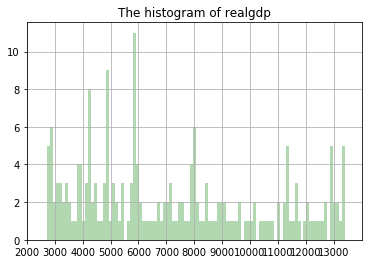

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
realgdp = macrodata['realgdp']
ax.set_xlim([2000, 14000])
ax.set_xticks(list(range(2000,14000,1000)))
realgdp.hist(ax=ax,bins=100, alpha=0.3, color='g')
plt.title('The histogram of realgdp')

Text(0.5,1,'The relationship between realgdp and realcons')

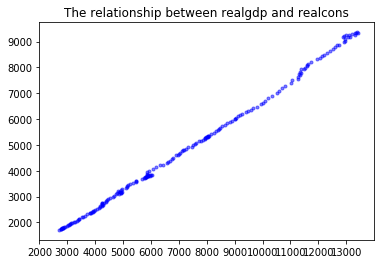

In [75]:
realcons = macrodata['realcons']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([2000, 14000])
ax.set_xticks(list(range(2000,14000,1000)))
plt.scatter(realgdp,realcons,c = 'b',marker = '.',alpha  = .5,)
plt.title('The relationship between realgdp and realcons')


In [4]:
tips = pd.read_csv(home/'data/tips.csv', index_col=0, parse_dates=True)
tips.head()

,tip,sex,smoker,day,time,size
total_bill,,,,,,
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4


In [91]:
#画出不同sex与day的交叉表的柱形图
party_counts = pd.crosstab(tips.sex, tips['day'])
party_counts

day,Fri,Sat,Sun,Thur
sex,,,,
Female,9,28,18,32
Male,10,59,58,30


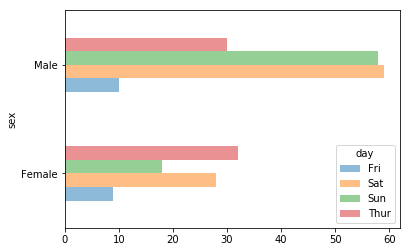

In [90]:
party_counts.plot(kind="barh",stacked = False, alpha=0.5)

In [131]:
#画出size的饼图
tips.head()

,tip,sex,smoker,day,time,size
total_bill,,,,,,
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4


In [145]:
import collections 
size = list(tips['size'])
size = collections.Counter(size)
size = pd.DataFrame.from_dict(size, orient='index').reset_index()
size.columns = ["Size","Freq"]

In [134]:
size

,index,freq
0,2,156
1,3,38
2,4,37
3,1,4
4,6,4
5,5,5


In [144]:
list(size.Size)

[2, 3, 4, 1, 6, 5]

In [154]:
list(size.Freq/sum(size.Freq))

[0.639344262295082,
 0.1557377049180328,
 0.15163934426229508,
 0.01639344262295082,
 0.01639344262295082,
 0.020491803278688523]

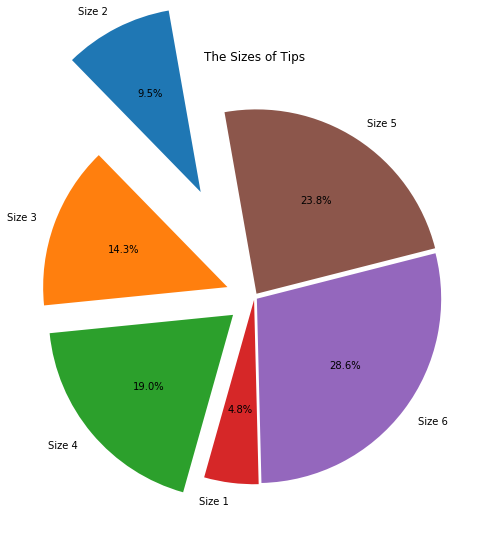

In [339]:
plt.figure(1, figsize=(8, 8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
values = list(size.Size)
explode=list(size.Freq/sum(size.Freq))

for i in range(len(values)):
    labels[i] = "Size "+str(values[i])    


plt.pie(values, explode=explode,labels = labels,autopct='%1.1f%%',startangle=100)

plt.title('The Sizes of Tips')

plt.show()